<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/classification/List6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [338]:
from google.colab import files
# files.upload()

!pip install -q kaggle
!mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
!cp '/content/drive/MyDrive/Colab Notebooks/secrets/kaggle.json' ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [339]:
!kaggle datasets download -d prathamtripathi/drug-classification

!mkdir dataset

!unzip -o -q /content/drug-classification.zip -d /content/dataset

drug-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘dataset’: File exists


In [340]:
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans, MeanShift
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import calinski_harabasz_score

In [341]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [342]:
iris = datasets.load_iris(as_frame=True)
wine = datasets.load_wine(as_frame=True)

In [343]:
drug = pd.read_csv("/content/dataset/drug200.csv", sep=",", header=0)

drug.rename(columns={
    'Age': 'age', 
    'Sex': 'sex', 
    'BP': 'pb', 
    'Cholesterol': 
    'cholesterol',
    'Na_to_K':'na_to_k_ratio', 
    'Drug': 'target'},
    inplace=True
    )

drug_target = drug.target

drug.drop(['target'], axis=1, inplace=True)


In [344]:
target_label_encoder = LabelEncoder()

target_label_encoder.fit(drug_target)

drug_target_labels = target_label_encoder.classes_

print(drug_target_labels)

drug_target = target_label_encoder.transform(drug_target)


# print(drug.shape)
# temp = drug_target.reshape(-1, 1)
# sns.pairplot(drug, hue=temp.any())

['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']


In [345]:
label_encoder = LabelEncoder()

drug['sex'] = label_encoder.fit_transform(drug['sex'])
drug['pb'] = label_encoder.fit_transform(drug['pb'])
drug['cholesterol'] = label_encoder.fit_transform(drug['cholesterol'])


In [346]:
lda_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
      ('lda_dim_reduction', LDA(n_components=2)),
    ]
)

# Zad 1

## Iris

In [347]:
iris_lda = pd.DataFrame(data=lda_pipeline.fit_transform(iris.data, iris.target), columns=['lda1', 'lda2'])

<Axes: xlabel='lda1', ylabel='lda2'>

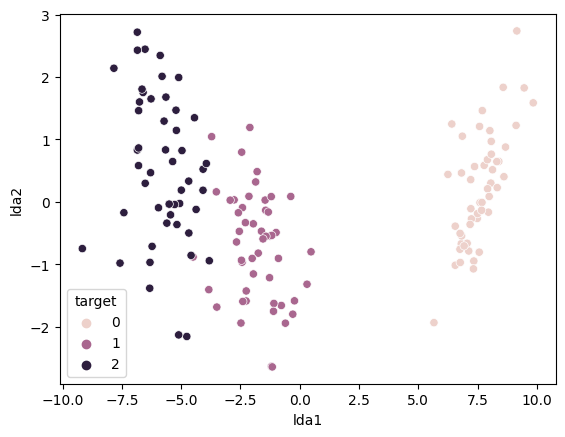

In [348]:
sns.scatterplot(data=iris_lda, x='lda1', y='lda2', hue=iris.target)

In [349]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_lda, iris.target, test_size=0.33)

In [350]:
# param_grid = {'n_neighbors': np.arange(3, 6)}

# knn_cv = GridSearchCV(knn, param_grid, cv=5)

# knn_cv.fit(X_train, Y_train)

In [351]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, Y_train)

Y_predict = knn.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

Y_proba_predict = knn.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

In [352]:
svc = SVC(gamma='auto', probability=True)

svc.fit(X_train, Y_train)

Y_predict = svc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

Y_proba_predict = svc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

In [353]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

Y_predict = dtc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

Y_proba_predict = dtc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

## Wine


In [354]:
wine_lda = pd.DataFrame(data=lda_pipeline.fit_transform(wine.data, wine.target), columns=['lda1', 'lda2'])

<Axes: xlabel='lda1', ylabel='lda2'>

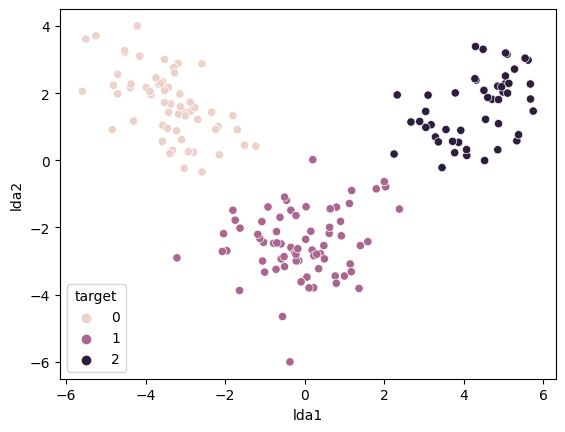

In [355]:
sns.scatterplot(data=wine_lda, x='lda1', y='lda2', hue=wine.target)

In [356]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_lda, wine.target, test_size=0.33)

In [357]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

Y_predict = knn.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

Y_proba_predict = knn.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

In [358]:
svc = SVC(gamma='auto', probability=True)

svc.fit(X_train, Y_train)

Y_predict = svc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

Y_proba_predict = svc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

In [359]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

Y_predict = dtc.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

Y_proba_predict = dtc.predict_proba(X_test)

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!

## Drug

<Axes: >

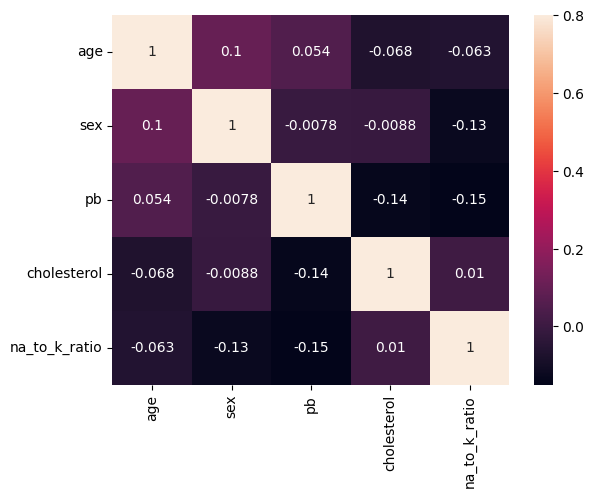

In [360]:
sns.heatmap(drug.corr(),vmax=0.8, annot= True)

In [361]:
pca_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
      ('pca_dim_reduction', PCA(n_components=2)),
    ]
)

# Zad 2

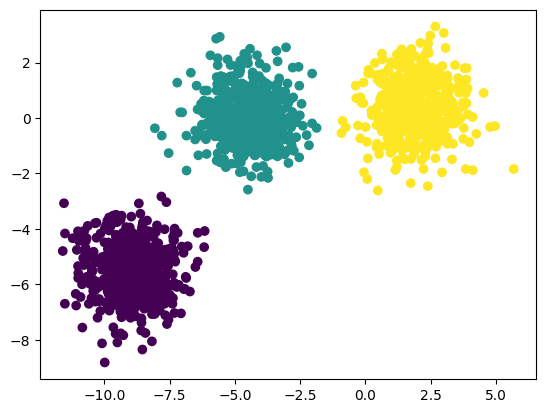

In [362]:
n_samples = 1500
random_state = 170


X, y = make_blobs(n_samples=n_samples, random_state=random_state)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

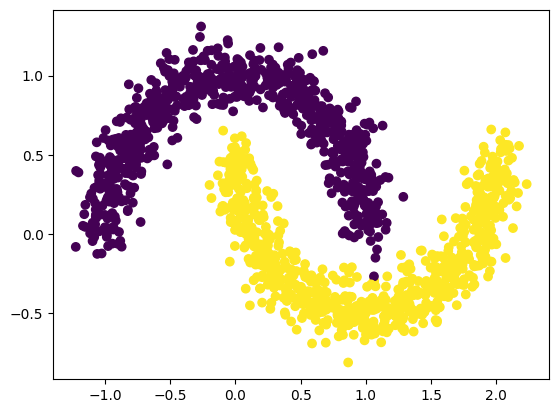

In [363]:
n_samples = 1500

X_moon, y_moon = make_moons(n_samples=n_samples, noise=0.1)

plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon)
plt.show()

## Blob


In [364]:
# spectral clustering


In [365]:
random_state = 170

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

Silhouette Coefficient for KMeans: 0.7333423486262539
Calinski-Harabasz Index for KMeans: 10633.868943793219
Rand index for KMeans: 1.0
Homogeneity for KMeans: 1.0
Mutual Information for KMeans: 1.09861228866811


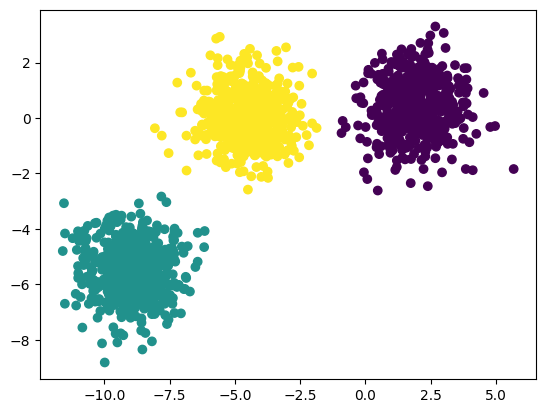

In [366]:
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

print(f'Silhouette Coefficient for KMeans: {silhouette_score(X, y_pred)}')
print(f'Calinski-Harabasz Index for KMeans: {calinski_harabasz_score(X, y_pred)}')
print(f'Rand index for KMeans: {rand_score(y, y_pred)}')
print(f'Homogeneity for KMeans: {homogeneity_score(y, y_pred)}')
print(f'Mutual Information for KMeans: {mutual_info_score(y, y_pred)}')

Silhouette Coefficient for MeanShift: 0.7333423486262539
Calinski-Harabasz Index for MeanShift: 10633.868943793219
Rand index for MeanShift: 1.0
Homogeneity for MeanShift: 1.0
Mutual Information for MeanShift: 1.09861228866811


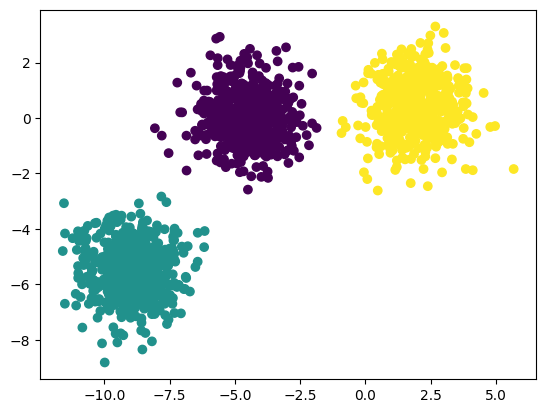

In [374]:
y_m_pred = MeanShift().fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_m_pred)

print(f'Silhouette Coefficient for MeanShift: {silhouette_score(X, y_m_pred)}')
print(f'Calinski-Harabasz Index for MeanShift: {calinski_harabasz_score(X, y_m_pred)}')
print(f'Rand index for MeanShift: {rand_score(y, y_m_pred)}')
print(f'Homogeneity for MeanShift: {homogeneity_score(y, y_m_pred)}')
print(f'Mutual Information for MeanShift: {mutual_info_score(y, y_m_pred)}')

Silhouette Coefficient for MeanShift: 0.7333423486262539
Calinski-Harabasz Index for MeanShift: 10633.868943793219
Rand index for MeanShift: 1.0
Homogeneity for MeanShift: 1.0
Mutual Information for MeanShift: 1.09861228866811


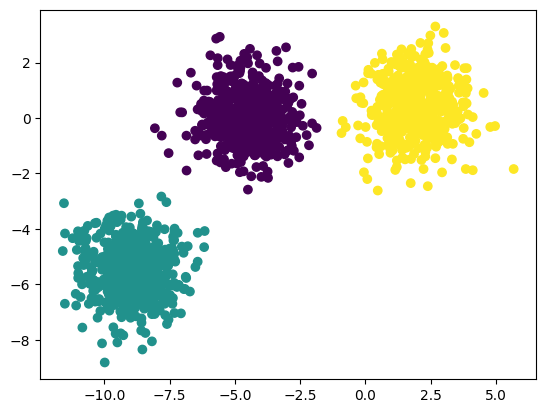

In [373]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3)

y_spec_predict = spectral.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_m_pred)

print(f'Silhouette Coefficient for MeanShift: {silhouette_score(X, y_spec_predict)}')
print(f'Calinski-Harabasz Index for MeanShift: {calinski_harabasz_score(X, y_spec_predict)}')
print(f'Rand index for MeanShift: {rand_score(y, y_spec_predict)}')
print(f'Homogeneity for MeanShift: {homogeneity_score(y, y_spec_predict)}')
print(f'Mutual Information for MeanShift: {mutual_info_score(y, y_spec_predict)}')

## Moon

In [369]:
# X_moon, y_moon

random_state = 170

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

Silhouette Coefficient for KMeans: 0.48532857537799917
Calinski-Harabasz Index for KMeans: 2177.8054989018724
Rand index for KMeans: 0.6287845230153436
Homogeneity for KMeans: 0.1951239475066486
Mutual Information for KMeans: 0.13524961407396027


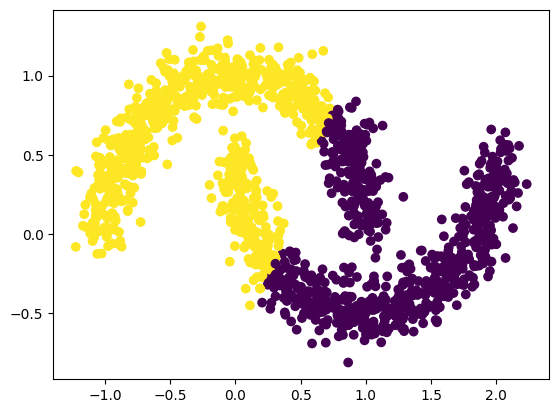

In [370]:
y_moon_pred = KMeans(n_clusters=2, **common_params).fit_predict(X_moon)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon_pred)

print(f'Silhouette Coefficient for KMeans: {silhouette_score(X_moon, y_moon_pred)}')
print(f'Calinski-Harabasz Index for KMeans: {calinski_harabasz_score(X_moon, y_moon_pred)}')
print(f'Rand index for KMeans: {rand_score(y_moon, y_moon_pred)}')
print(f'Homogeneity for KMeans: {homogeneity_score(y_moon, y_moon_pred)}')
print(f'Mutual Information for KMeans: {mutual_info_score(y_moon, y_moon_pred)}')

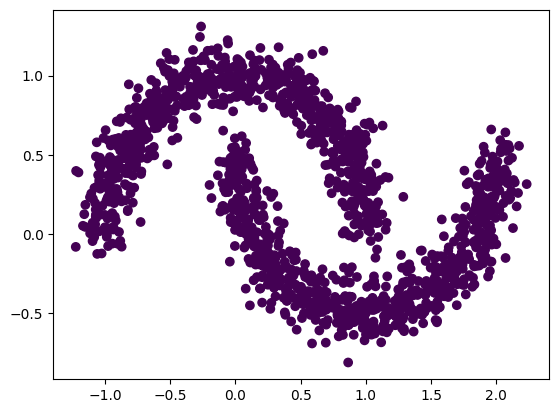

In [371]:
y_moon_m_pred = MeanShift().fit_predict(X_moon)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon_m_pred)

# print(f'Silhouette Coefficient for MeanShift: {silhouette_score(X_moon, y_moon_m_pred)}')
# print(f'Calinski-Harabasz Index for MeanShift: {calinski_harabasz_score(X_moon, y_moon_m_pred)}')
# print(f'Rand index for MeanShift: {rand_score(y_moon_m, y_moon_m_pred)}')
# print(f'Homogeneity for MeanShift: {homogeneity_score(y_moon_m, y_moon_m_pred)}')
# print(f'Mutual Information for MeanShift: {mutual_info_score(y_moon_m, y_moon_m_pred)}')

Silhouette Coefficient for SpectralClustering: 0.48630693277997944
Calinski-Harabasz Index for SpectralClustering: 2169.610693592416
Rand index for SpectralClustering: 0.6441263064265066
Homogeneity for SpectralClustering: 0.2196763135043589
Mutual Information for SpectralClustering: 0.15226801734134904


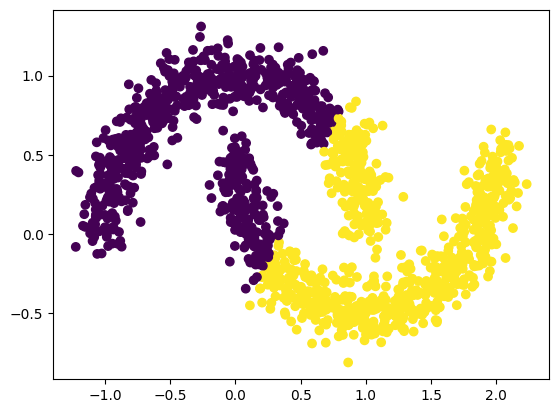

In [377]:
spectral = SpectralClustering(n_clusters=2)

y_spec_predict = spectral.fit_predict(X_moon)

plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_spec_predict)

print(f'Silhouette Coefficient for SpectralClustering: {silhouette_score(X_moon, y_spec_predict)}')
print(f'Calinski-Harabasz Index for SpectralClustering: {calinski_harabasz_score(X_moon, y_spec_predict)}')
print(f'Rand index for SpectralClustering: {rand_score(y_moon, y_spec_predict)}')
print(f'Homogeneity for SpectralClustering: {homogeneity_score(y_moon, y_spec_predict)}')
print(f'Mutual Information for SpectralClustering: {mutual_info_score(y_moon, y_spec_predict)}')